<a href="https://colab.research.google.com/github/NehaMariamToney/machine-learning/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAR PRICE PREDICTION**

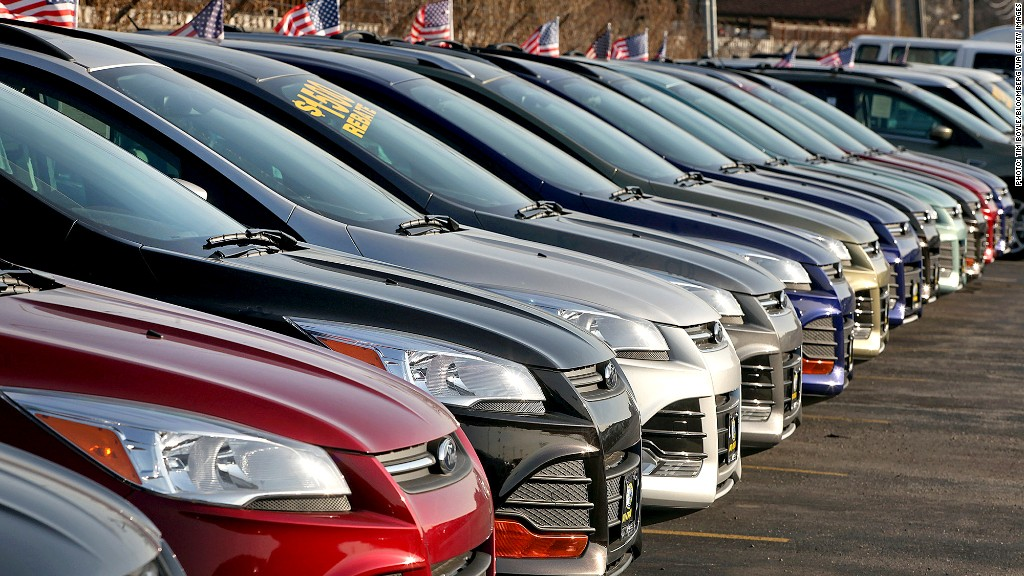

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
#first 5 rows
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
#last 5 rows
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
#each column name
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
#about the dataset
df.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

In [ ]:
#each column datatype
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

pure object:name,location,fuel type,transmission,owner type

In [ ]:
#total number of rows and columns
df.shape

(6019, 14)

In [ ]:
#total no of elements
df.size

84266

Preprocessing Steps

In [ ]:
#to find missing values
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

To count values

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [ ]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
df['Mileage'].value_counts()

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
27.28 kmpl      1
14.57 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.24 kmpl      1
Name: Mileage, Length: 442, dtype: int64

In [ ]:
df['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
2147 CC      1
2495 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 146, dtype: int64

In [ ]:
df['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
76.9 bhp        1
201 bhp         1
199.3 bhp       1
95 bhp          1
181.04 bhp      1
Name: Power, Length: 372, dtype: int64

In [ ]:
df['New_Price'].value_counts()

95.13 Lakh    6
4.78 Lakh     6
63.71 Lakh    6
11.26 Lakh    5
44.28 Lakh    5
             ..
1.27 Cr       1
38.11 Lakh    1
8.12 Lakh     1
71.15 Lakh    1
9.93 Lakh     1
Name: New_Price, Length: 540, dtype: int64

Data Visualisation

(array([  10.,   23.,   48.,  135.,  299.,  540., 1046., 1446., 1485.,
         987.]),
 array([1998. , 2000.1, 2002.2, 2004.3, 2006.4, 2008.5, 2010.6, 2012.7,
        2014.8, 2016.9, 2019. ]),
 <BarContainer object of 10 artists>)

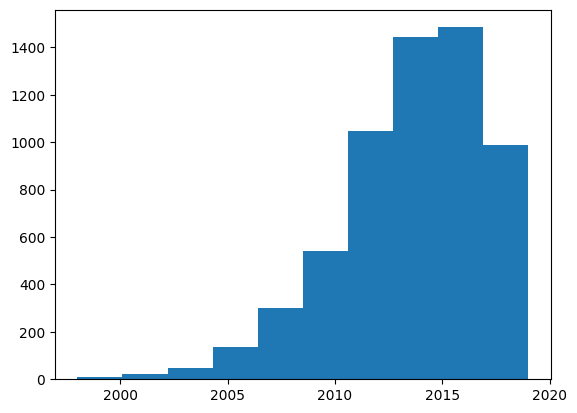

In [ ]:
plt.hist(df['Year'])

<Axes: xlabel='Transmission', ylabel='count'>

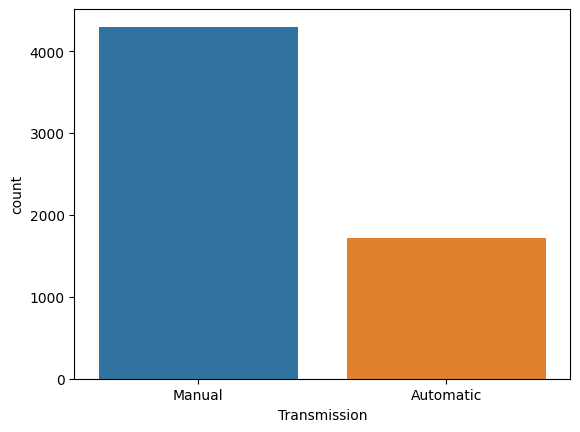

In [ ]:
sns.countplot(x='Transmission',data=df)

<Axes: xlabel='Fuel_Type', ylabel='count'>

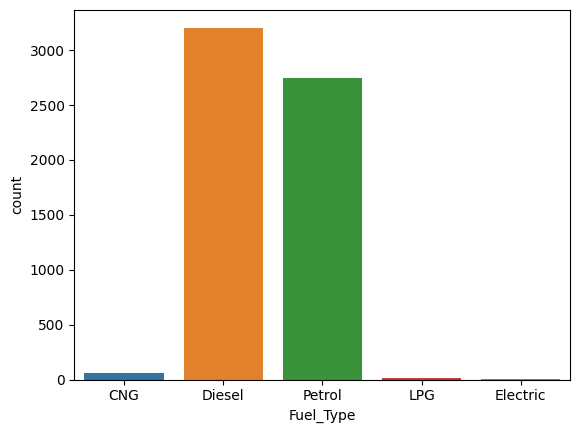

In [ ]:
sns.countplot(x='Fuel_Type',data=df)

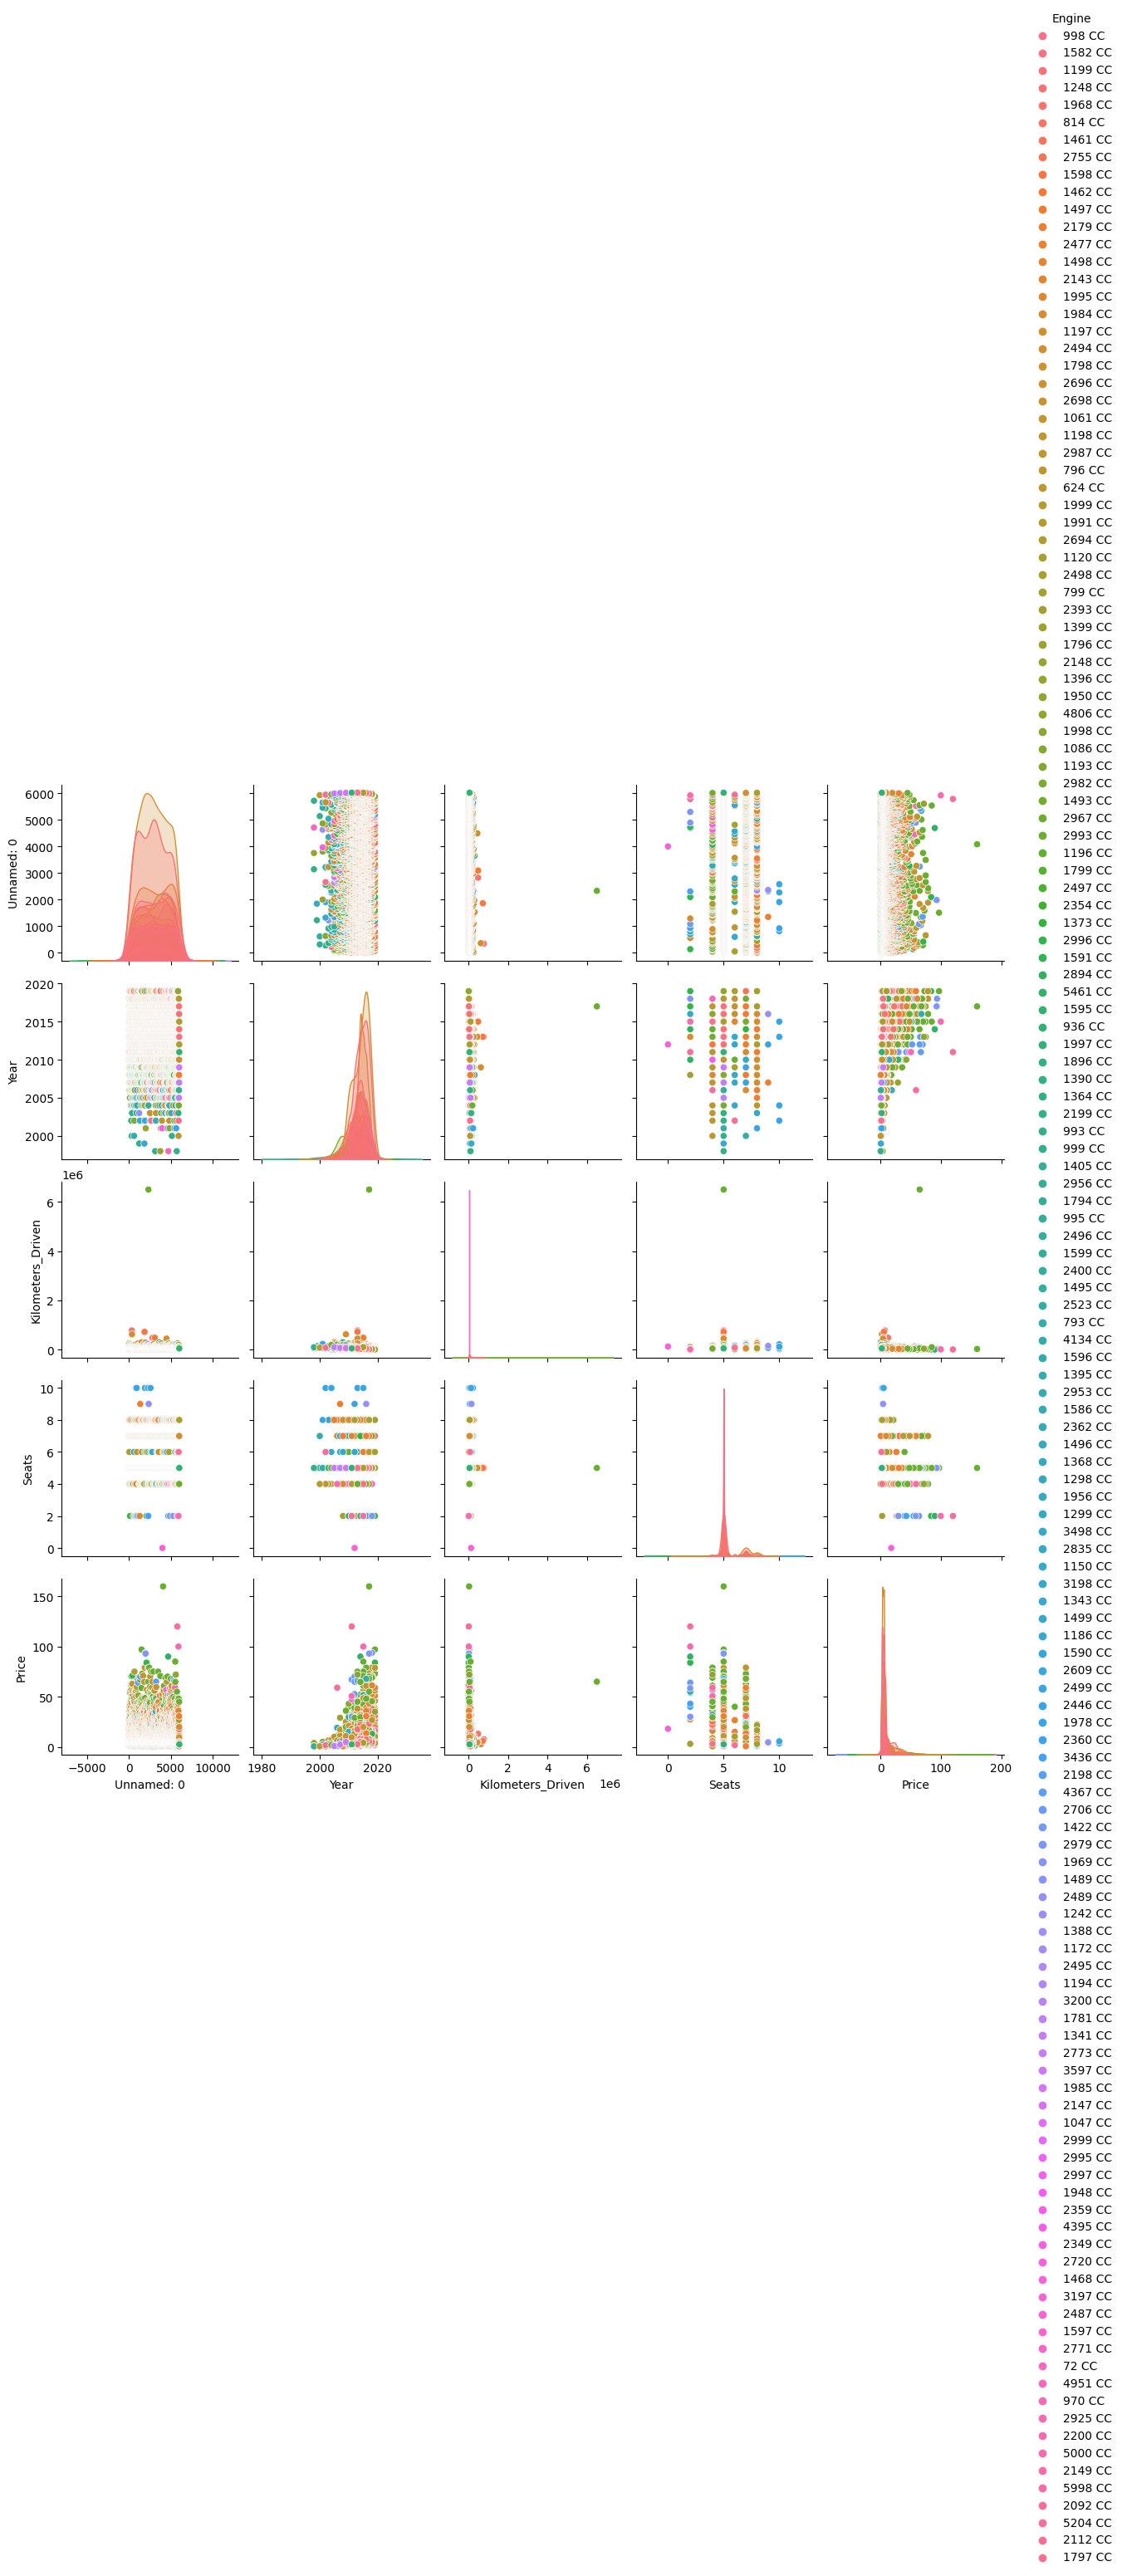

In [ ]:
sns.pairplot(df,hue='Engine')

In [ ]:
#to encode string
df1=pd.get_dummies(df[['Location','Transmission','Fuel_Type','Owner_Type']],drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
#we need to combine df and df1 so that we use concat function
dfe=pd.concat([df,df1],axis=1)
dfe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,1,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,1,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,1,0,0,0,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,1,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,1,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,1,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,1,0,0,0,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
dfe.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

we are dropping name(different types of objects) because of over fitting (it affects the model)

In [ ]:
dfe=dfe.drop(['Unnamed: 0','Name','New_Price','Location','Fuel_Type','Transmission','Owner_Type'],axis=1)

In [ ]:
dfe.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [ ]:
#to replace strings: mileage,engine,power
dfe['Mileage']=dfe['Mileage'].str.replace('km/kg','')
dfe['Mileage']=dfe['Mileage'].str.replace('kmpl','')
dfe['Engine']=dfe['Engine'].str.replace('CC','')
dfe['Power']=dfe['Power'].str.replace('bhp','')
# replace null value by zero
dfe['Mileage']=dfe['Mileage'].str.replace('null','0')  #0==>object we convert them to float
dfe['Engine']=dfe['Engine'].str.replace('null','0')
dfe['Power']=dfe['Power'].str.replace('null','0')
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,1,0,0,0,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,1,0,0,0,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
#convert mileage,engine,power to float
dfe['Engine']=dfe['Engine'].astype(float)
dfe['Power']=dfe['Power'].astype(float)
dfe['Mileage']=dfe['Mileage'].astype(float)
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Transmission_Manual            uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
#checking new dataframe having any missing values
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Transmission_Manual           0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
#replacing missing values
dfe.loc[dfe.Engine==0,'Engine']=np.NaN #act as missing value
dfe.loc[dfe.Power==0,'Power']=np.NaN
dfe.loc[dfe.Mileage==0,'Mileage']=np.NaN


In [ ]:
dfe.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Transmission_Manual            0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [ ]:
#filling missing values using mean,median and mode Here we use mean and mode
dfe['Mileage']=dfe['Mileage'].fillna(dfe['Mileage'].mean())
dfe['Power']=dfe['Power'].fillna(dfe['Power'].mean())
dfe['Engine']=dfe['Engine'].fillna(dfe['Engine'].mean())
dfe['Seats']=dfe['Seats'].fillna(dfe['Seats'].mode() [0])

In [ ]:
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Transmission_Manual          0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
dfe.drop(['Fuel_Type_Electric'],axis=1,inplace=True)

In [ ]:
#separating x and y for model creation
x=dfe.drop(['Price'],axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
y=dfe['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [ ]:
dfe.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4201,2011,77000,22.07,1199.0,73.9,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4383,2016,19947,20.36,1197.0,78.9,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1779,2014,70963,15.10,2179.0,140.0,7.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4020,2013,115195,25.20,1248.0,74.0,5.0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3248,2011,58752,16.47,1198.0,73.9,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,17.97,1498.0,99.6,5.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5191,2019,9000,12.62,2198.0,158.0,7.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5226,2013,140000,15.10,2179.0,140.0,7.0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
5390,2014,76414,25.80,1498.0,98.6,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
x_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2868,2013,69000,23.400000,1248.00000,74.00000,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5924,2017,26741,15.400000,1997.00000,120.00000,7.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3764,2014,86000,15.100000,2179.00000,140.00000,7.0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4144,2016,52000,25.000000,1396.00000,69.01000,5.0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,0
2780,2009,100000,18.342252,1621.27645,113.25305,5.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2014,91586,11.180000,2696.00000,184.00000,7.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1294,2009,55005,12.800000,1621.27645,113.25305,5.0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1876,2014,48800,19.100000,1197.00000,85.80000,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1432,2017,25095,18.160000,1196.00000,86.80000,5.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
#Model creation
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 4.9400345 , 13.37912353, 11.64051149, ...,  2.60278857,
        9.69775498,  6.40222655])

In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
print('Means absolute error is',mean_absolute_error(y_test,y_pred))

Means absolute error is 3.8710991127166494


In [ ]:
#mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
print('Means absolute percentage error is',mean_absolute_percentage_error(y_test,y_pred))

Means absolute percentage error is 0.7926621897271338


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error is",mean_squared_error(y_test,y_pred))

mean squared error is 60.514755781824206


In [ ]:
#r2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.5080047797086019
